In [53]:
#Import libraries for task
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageEnhance
import numpy as np
import os
import os
import random
from PIL import Image, ImageDraw, ImageFont
from faker import Faker
from signature import SignatureGenerator

## Task1: Create Synthetic dataset of signatures on Pakistani Identity Cards

In [45]:
# Set up the image size 
IMG_SIZE = (512, 320)
#FONT_SIZE = 20
#font = ImageFont.truetype('arial.ttf', FONT_SIZE)

In [51]:
# Set up the faker generator for random names and addresses
fake = Faker()

# Set up the signature generator
signature_generator = SignatureGenerator()

In [48]:
# Set up the output directory and label file
OUTPUT_DIR = 'synthetic_dataset'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

label_file = open(os.path.join(OUTPUT_DIR, 'labels.txt'), 'w')

In [ ]:
# Generate 1000 identity card images
for i in range(20):
    # Generate the placeholder text for the identity card
    name = fake.name()
    address = fake.address()
    dob = fake.date_of_birth().strftime('%m/%d/%Y')
    id_number = fake.ssn()

    # Create a blank image for the identity card
    img = Image.new('RGB', IMG_SIZE, color='white')
    draw = ImageDraw.Draw(img)

    # Draw the text onto the identity card
    draw.text((20, 20), 'Name: ' + name, fill='black')
    draw.text((20, 60), 'Address: ' + address, fill='black')
    draw.text((20, 100), 'DOB: ' + dob, fill='black')
    draw.text((20, 140), 'ID Number: ' + id_number, fill='black')

    # Add a blank signature field to the identity card
    draw.rectangle((IMG_SIZE[0] - 200, IMG_SIZE[1] - 80, IMG_SIZE[0] - 20, IMG_SIZE[1] - 20), outline='black')

    # Generate a synthetic signature
    signature_img = signature_generator.generate_signature()

    # Overlay the signature onto the identity card
    img.paste(signature_img, (IMG_SIZE[0] - 190, IMG_SIZE[1] - 70))

    # Save the image and label information
    img_filename = os.path.join(OUTPUT_DIR, f'image_{i:04d}.jpg')
    img.save(img_filename)
    label_file.write(f'{img_filename}\t{name}\t{address}\t{dob}\t{id_number}\n')

label_file.close()


### Task2: Annotate 6 to 7 images (you can use attached cat_dog.zip for this and annotate cats and dogs using rectangles) using via annotator (find on internet or use the provided one in attachments), save the project, it will save all the annotations to a json file. Now your task is to create a notebook which load data from that json, load the information of bounding boxes along with label names and display / draw those on their respective images.

In [6]:
# Load the JSON file
with open('cat_dog_annotations.json') as f:
    data_json = json.load(f)

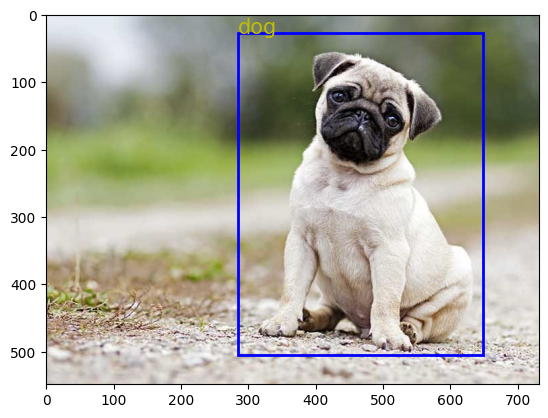

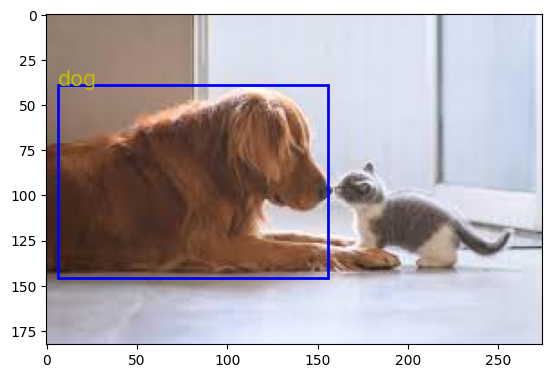

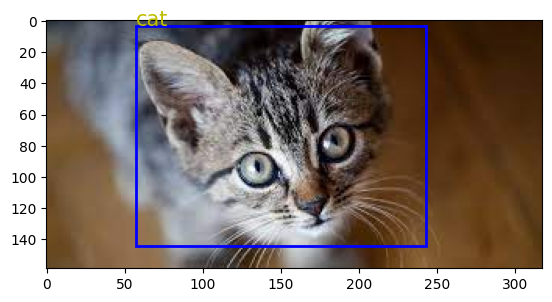

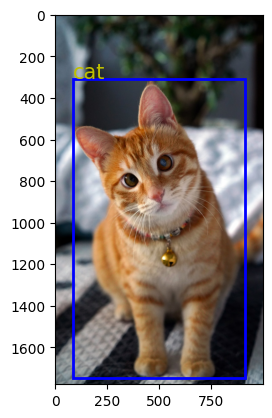

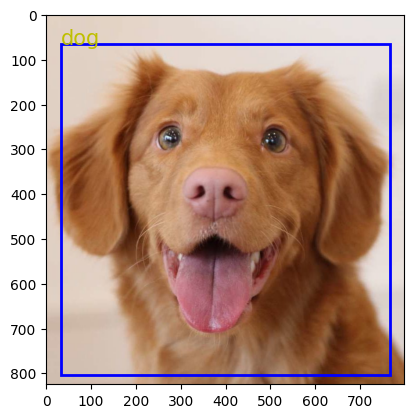

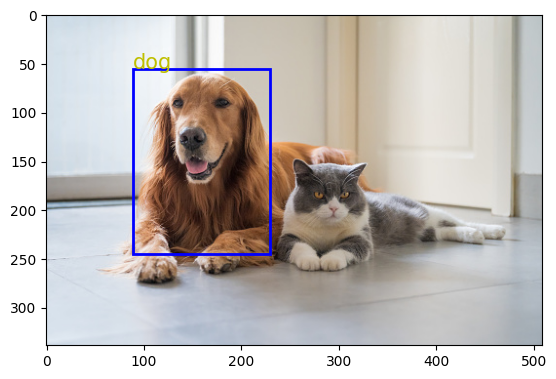

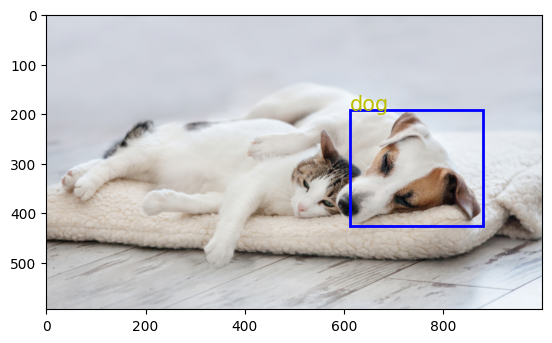

In [26]:
# show images in the data
for img_id, img_data in data['_via_img_metadata'].items():
    # Load the image
    filename = img_data['filename']
    image = Image.open(filename)
    # Create a subplot and show the image
    fig, ax = plt.subplots()
    ax.imshow(image)
    # Loop over each region in the image
    for region in img_data['regions']:
        # Get the bounding box coordinates and label
        bx = region['shape_attributes']['x']
        by = region['shape_attributes']['y']
        b_width = region['shape_attributes']['width']
        b_height = region['shape_attributes']['height']
        b_label = list(region['region_attributes']['class'].keys())[0]
        
        # Create a rectangle patch and add it to the subplot
        b_rectangle = patches.Rectangle((bx, by), b_width, b_height, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(b_rectangle)
        
         # Add the label as a text annotation
        ax.text(bx, by, b_label, fontsize=15, color='y')

        # Show the image with bounding boxes and labels
        plt.show()


### Task3: Augment the images provided in cat_dog.zip for
#### i) rotation: create 72 images agains each single image for each 5 degree i.e., for 1.jpeg there should be 1_5degree.jpeg, 1_10degree.jpeg, 1_15degree.jpeg, ..., 1_350degree.jpeg and 1_355degree.jpeg (total 72 images) and 72 images for all other images too. There are 7 images in cat_dog.zip so the resultant folder should contain total 504 images
#### ii) brightness: change brightness to random level and create 5 images for each single image. Resultant directory should contain 7*5=35 images
#### iii) noise: add noise to create 5 images for each single image. Resultant directory should contain 7*5=35 images

In [37]:
# Function to add noise to the image
def func_noise(image_path):
    with Image.open(image_path) as img:
        img_array = np.array(img)
        noise = np.random.randint(0, 50, size=img_array.shape)
        noisy_image = np.clip(img_array + noise, 0, 255).astype(np.uint8)
        return Image.fromarray(noisy_image)

In [29]:
# Function to rotate the image
def func_rotate(image_path, degrees):
    with Image.open(image_path) as img:
        rotated_image = img.rotate(degrees)
        return rotated_image

In [30]:
# Function to change the brightness of the image
def func_brightness(image_path, factor):
    with Image.open(image_path) as img:
        enhancer = ImageEnhance.Brightness(img)
        enhanced_image = enhancer.enhance(factor)
        return enhanced_image

In [31]:
# Create directories to save the augmented images
if not os.path.exists('rotated'):
    os.makedirs('rotated')
if not os.path.exists('brightness'):
    os.makedirs('brightness')
if not os.path.exists('noise'):
    os.makedirs('noise')

In [32]:
# Augment images with rotation
for file in os.listdir('cat_dog'):
    if file.endswith('.jpeg'):
        for i in range(72):
            degrees = i * 5
            rotated_image = func_rotate(f'cat_dog/{file}', degrees)
            rotated_image.save(f'rotated/{file[:-5]}_{degrees}.jpeg')

In [38]:
# Augment images with noise
for file in os.listdir('cat_dog'):
    if file.endswith('.jpeg'):
        for i in range(5):
            noisy_image = func_noise(f'cat_dog/{file}')
            noisy_image.save(f'noise/{file[:-5]}_{i}.jpeg')

In [40]:
# Augment images with brightness
for file in os.listdir('cat_dog'):
    if file.endswith('.jpeg'):
        for i in range(5):
            factor = np.random.uniform(1.5, 2.5)
            enhanced_image = func_brightness(f'cat_dog/{file}', factor)
            enhanced_image.save(f'brightness/{file[:-5]}_{i}.jpeg')